In [1]:
import pandas as pd
df=pd.read_csv('Boston.csv')
df.head(2)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [2]:
df2=df.fillna(df.mean())

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_4256\69213145.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2=df.fillna(df.mean())


In [3]:
dummy=pd.get_dummies(df2['CRIME'],drop_first=True)
df3=df2.join(dummy)
df3=df3.drop(['CRIME'],axis=1)
df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [4]:
from sklearn.preprocessing import StandardScaler
df4=df3.astype('float')
sc=StandardScaler()
sc_df=sc.fit_transform(df4)

In [5]:
from sklearn.decomposition import PCA

In [6]:
model=PCA(n_components=2,whiten=True)

In [7]:
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [8]:
print(model.components_[0])
print('-----')
print(model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
-----
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [9]:
new=model.transform(sc_df)
new_df=pd.DataFrame(new)
new_df.head(3)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175


In [10]:
new_df.columns=['PC1','PC2']
df5=pd.DataFrame(sc_df,columns=df4.columns)
df6=pd.concat([df5,new_df],axis=1)

In [11]:
df_corr=df6.corr()
df_corr.loc[:'very_low','PC1':]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


In [12]:
pc_corr=df_corr.loc[:'very_low','PC1':]
pc_corr['PC1'].sort_values(ascending=False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [14]:
pc_corr['PC2'].sort_values(ascending=False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<Axes: xlabel='City', ylabel='Exclusive residential'>

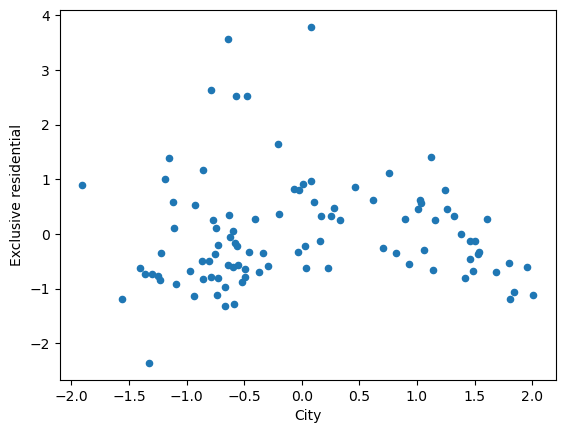

In [15]:
col=['City','Exclusive residential']
new_df.columns=col
new_df.plot(kind='scatter',x='City',y='Exclusive residential')

In [16]:
model=PCA(whiten=True)
tmp=model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [17]:
model.explained_variance_ratio_

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

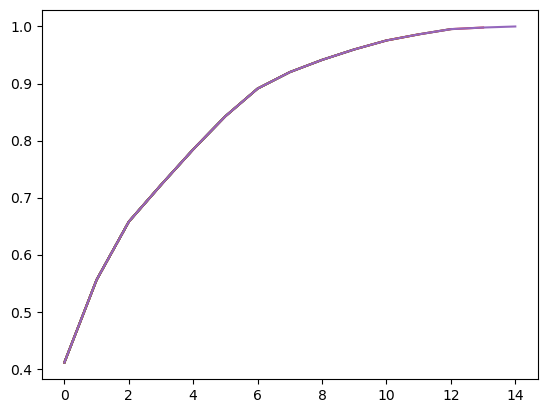

In [19]:
ratio=model.explained_variance_ratio_
array=[]

for i in range(len(ratio)):
    ruiseki=sum(ratio[0:(i+1)])
    array.append(ruiseki)
    pd.Series(array).plot(kind='line')

In [20]:
thred=0.8

for i in range(len(array)):
    if array[i]>=thred:
        print(i+1)
        break

6


In [21]:
model=PCA(n_components=6,whiten=True)
model.fit(sc_df)
new=model.transform(sc_df)

In [22]:
col=['PC1','PC2','PC3','PC4','PC5','PC6']
new_df2=pd.DataFrame(new,columns=col)
new_df2.to_csv('boston_pca.csv',index=False)